In [1]:
'''
goal: model the curse of dimensionality

how: start with the 1D case, how close is a neighbor on a 1D line

P(interior) = 1- 2*epsilon

so a simple modeling case here is how likely for points to be on the interior

for a 2D case, it would be interior of a square

so in the x: (1-2*epsilon)
in the y: (1-2*epsilon)

total: (1-2*epsilon)^2

and this could keep growing. so for every dim, P(interior) = (1-2*epsilon)^dim

'''

'\ngoal: model the curse of dimensionality\n\nhow: start with the 1D case, how close is a neighbor on a 1D line\n\nP(interior) = 1- 2*epsilon\n\nso a simple modeling case here is how likely for points to be on the interior\n\nfor a 2D case, it would be interior of a square\n\nso in the x: (1-2*epsilon)\nin the y: (1-2*epsilon)\n\ntotal: (1-2*epsilon)^2\n\nand this could keep growing. so for every dim, P(interior) = (1-2*epsilon)^dim\n\n'

In [2]:
import numpy as np


In [3]:
n = 8

dim = [2**i for i in range(n)]

epsilon = .2

prob = [(1-2*epsilon)**d for d in dim]



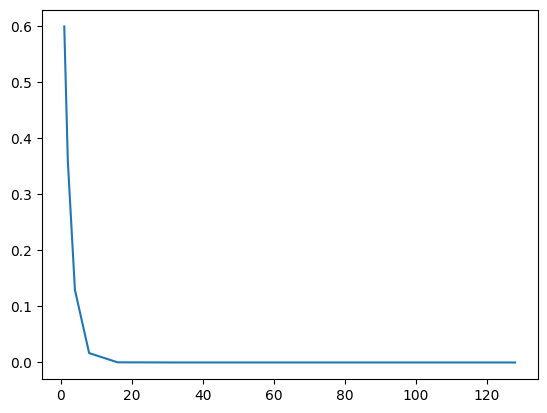

In [4]:
#on x axis, the dim
#on y, the prob

import matplotlib.pyplot as plt

# plot
fig, ax = plt.subplots()

ax.plot(dim, prob)

plt.show()

In [21]:
import pandas as pd

n = 10

dim = [2**i for i in range(n)]

epsilons = np.linspace(0.01, 0.1, 10)  # Example range of epsilon values

# Compute probability matrix
prob_matrix = np.array([[ (1 - 2 * eps) ** d for d in dim] for eps in epsilons])
dim = np.array(dim)

# Convert to DataFrame for better visualization
# Convert to DataFrame and include epsilon as a column
df = pd.DataFrame(prob_matrix, columns=dim )
df.insert(0, "epsilon", epsilons)  # Insert epsilon as the first column

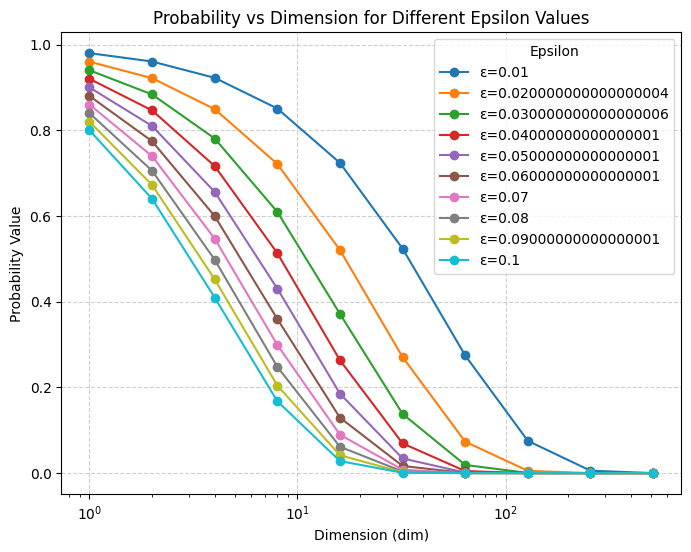

In [24]:
# Plotting
plt.figure(figsize=(8, 6))
for _, row in df.iterrows():
    plt.plot(dim, row[1:], marker='o', label=f'ε={row["epsilon"]}')


# Set Log Scale for Y-Axis
plt.xscale("log")

# Formatting
plt.xlabel("Dimension (dim)")
plt.ylabel("Probability Value")
plt.title("Probability vs Dimension for Different Epsilon Values")
plt.legend(title="Epsilon")
plt.grid(True, linestyle="--", alpha=0.6)

In [32]:
# euclidean distance of the unit hypercube

distance = [np.sqrt(d) for d in dim]

In [33]:
distance

[1.0,
 1.4142135623730951,
 2.0,
 2.8284271247461903,
 4.0,
 5.656854249492381,
 8.0,
 11.313708498984761,
 16.0,
 22.627416997969522]

Text(0.5, 1.0, 'Unit Hypercube Corner Distance to Origin')

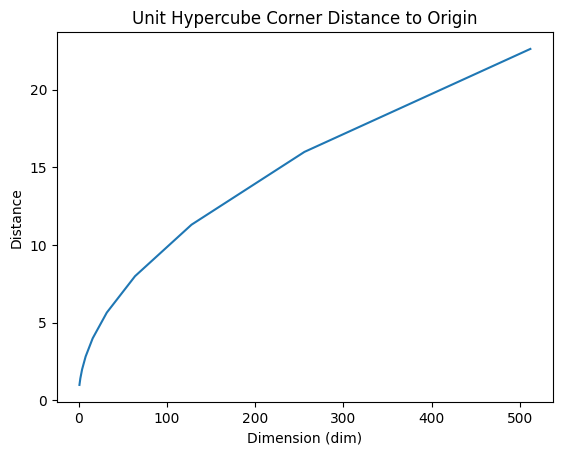

In [41]:
plt.plot(dim, distance)
# Set Log Scale for Y-Axis
#plt.yscale("log")
# Set Log Scale for Y-Axis
#plt.xscale("log")#



plt.xlabel("Dimension (dim)")
plt.ylabel("Distance")
plt.title("Unit Hypercube Corner Distance to Origin")


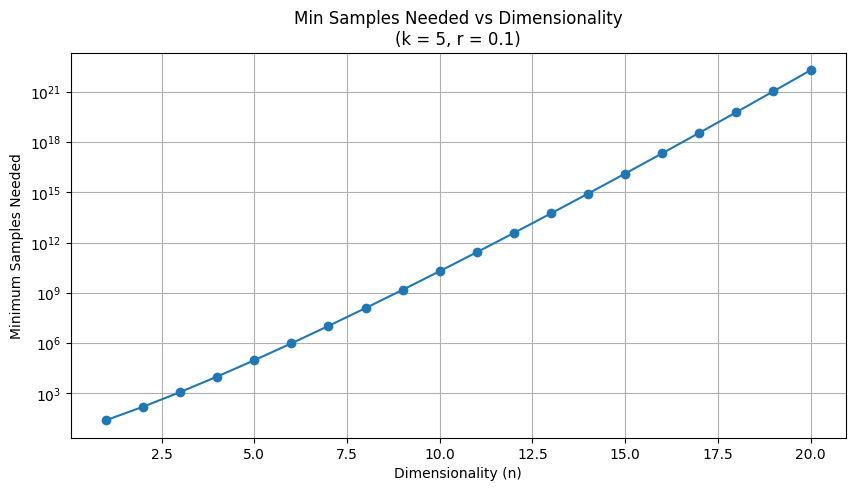

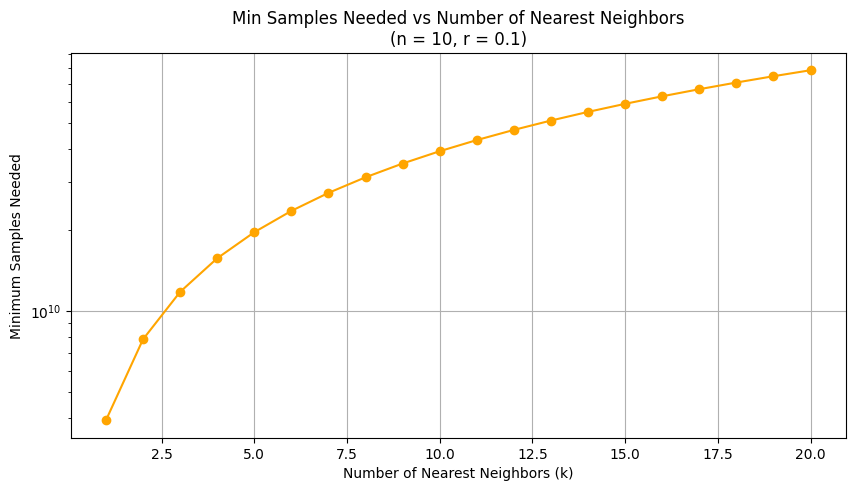

In [44]:
import math
import matplotlib.pyplot as plt
import numpy as np

def n_dim_ball_volume(r, n):
    """Calculate the volume of an n-dimensional ball with radius r."""
    return (math.pi ** (n / 2) / math.gamma(n / 2 + 1)) * (r ** n)

def min_samples_for_kNN(k, r, n):
    """
    Calculate the minimum number of data points required so that,
    on average, a ball of radius r in an n-dimensional unit hypercube
    contains at least k points.
    """
    volume = n_dim_ball_volume(r, n)
    return k / volume

# Parameters for the local neighborhood
r = 0.1  # radius of the local neighborhood

# ---------------------------
# Graph 1: Varying Dimensionality
# ---------------------------
k_fixed = 5  # fixed number of nearest neighbors
dimensions = np.arange(1, 21)  # Consider dimensions 1 through 20

# Compute minimum samples needed for each dimension with fixed k and r
min_samples_dim = [min_samples_for_kNN(k_fixed, r, n) for n in dimensions]

plt.figure(figsize=(10, 5))
plt.plot(dimensions, min_samples_dim, marker='o')
plt.title(f"Min Samples Needed vs Dimensionality\n(k = {k_fixed}, r = {r})")
plt.xlabel("Dimensionality (n)")
plt.yscale("log")
plt.ylabel("Minimum Samples Needed")
plt.grid(True)
plt.show()

# ---------------------------
# Graph 2: Varying Number of Nearest Neighbors
# ---------------------------
n_fixed = 10  # fixed dimensionality
ks = np.arange(1, 21)  # Consider k from 1 to 20

# Compute minimum samples needed for each k with fixed n and r
min_samples_k = [min_samples_for_kNN(k, r, n_fixed) for k in ks]

plt.figure(figsize=(10, 5))
plt.plot(ks, min_samples_k, marker='o', color='orange')
plt.title(f"Min Samples Needed vs Number of Nearest Neighbors\n(n = {n_fixed}, r = {r})")
plt.xlabel("Number of Nearest Neighbors (k)")
plt.ylabel("Minimum Samples Needed")
plt.yscale("log")
plt.grid(True)
plt.show()


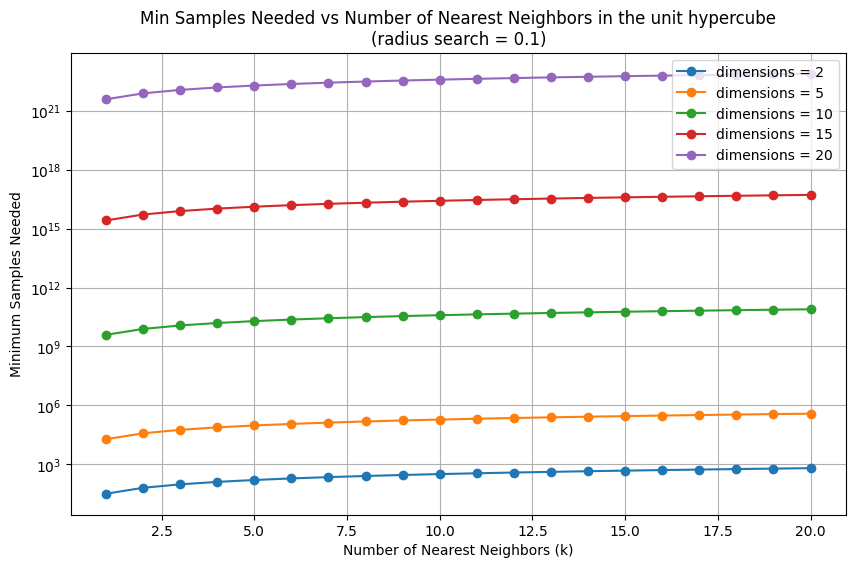

In [48]:
import math
import matplotlib.pyplot as plt
import numpy as np

def n_dim_ball_volume(r, n):
    """Calculate the volume of an n-dimensional ball with radius r."""
    return (math.pi ** (n / 2) / math.gamma(n / 2 + 1)) * (r ** n)

def min_samples_for_kNN(k, r, n):
    """
    Calculate the minimum number of data points required so that,
    on average, a ball of radius r in an n-dimensional unit hypercube
    contains at least k points.
    """
    volume = n_dim_ball_volume(r, n)
    return k / volume

# Parameters
r = 0.1                # Radius of the local neighborhood
ks = np.arange(1, 21)  # k from 1 to 20
dimensions_list = [2, 5, 10, 15, 20]  # Different dimensions to plot

plt.figure(figsize=(10, 6))

for n in dimensions_list:
    min_samples = [min_samples_for_kNN(k, r, n) for k in ks]
    plt.plot(ks, min_samples, marker='o', label=f"dimensions = {n}")

plt.title(f"Min Samples Needed vs Number of Nearest Neighbors in the unit hypercube\n(radius search = {r})")
plt.xlabel("Number of Nearest Neighbors (k)")
plt.ylabel("Minimum Samples Needed")
plt.yscale('log')  # Optional: Use a log scale if values grow quickly
plt.grid(True)
plt.legend()
plt.show()
